In [1]:
from pythtb import * # import TB model class
import numpy as np

import matplotlib.pyplot as plt

import ase
import ase.io
import ase.neighborlist
import ase.visualize.plot

In [2]:
geom = ase.io.read("./c_c_test.xyz")
lat = [
    [1.0,0.0],
    [0.0,1.0]
]
geom.center(about=0.0)
orb = []
for at in geom:
    orb.append(at.position[:2])

In [3]:
f = open("eigenvals_c_c_bond.txt","r")
#print(f.readline())


num_lines = sum(1 for line in open('eigenvals_c_c_bond.txt', "r"))
#print(num_lines)


evals = np.zeros(num_lines, dtype=float)
evecs_shape = (num_lines, num_lines)
evecs = np.zeros(evecs_shape, dtype=complex)

counter = 0
word_count = 0
for line in f:
    #print(line)
    splitted_line = line.split(' ')

    evals[counter] = np.float64(splitted_line[0])
    splitted_line.pop(0)

    x = ''
    y = ''
    y_turn = False
    for i in splitted_line[0]:
        if(i == '(' or i == ' '):
            continue
        if(i != ',' and y_turn == False):
            x += i
        elif(i == ','):
            y_turn = True
            continue
        elif(i != ')'):
            y += i
        else:
            
            evecs[counter, word_count] = complex(float(x), float(y))
            x = ''
            y = ''
            word_count = word_count + 1
            y_turn = False

    
    counter = counter + 1
    word_count = 0
    
print(evecs)

[[-0.707107+0.j -0.      +0.j -0.707107+0.j -0.      +0.j]
 [-0.      +0.j -0.707107+0.j -0.      +0.j -0.707107+0.j]
 [ 0.      +0.j -0.707107+0.j  0.      +0.j  0.707107+0.j]
 [-0.707107+0.j  0.      +0.j  0.707107+0.j  0.      +0.j]]


In [4]:
ed = num_lines//2
print(num_lines, ed)
homo = ed-1

4 2


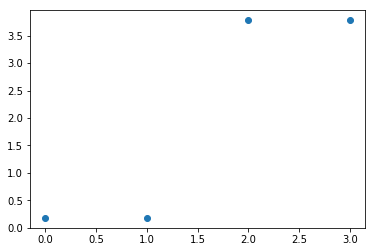

0.18
0.18
3.78
3.78


In [5]:
plt.plot(evals, 'o')
plt.show()
for ev in evals:
    print(ev)

In [10]:
def visualize_backbone(ax, atoms):
    i_arr, j_arr = ase.neighborlist.neighbor_list('ij', atoms, 1.8)
    for i, j in zip(i_arr, j_arr):
        if i < j:
            p1 = atoms.positions[i]
            p2 = atoms.positions[j]
            ax.plot([p1[0], p2[0]], [p1[1], p2[1]], 'k-', linewidth=3.0, solid_capstyle='round')
            
def visualize_evec(ax, atoms, evec):
    for at, e in zip(atoms, evec):
        p = at.position
        mod = np.abs(e)/2.0
        phase = np.angle(e)/np.pi
        col = (1.0-phase, 0.0, phase)
        circ = plt.Circle(p[:2], mod, color=col, zorder=10)
        ax.add_artist(circ)

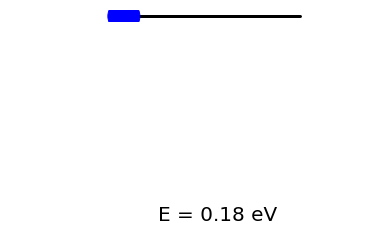

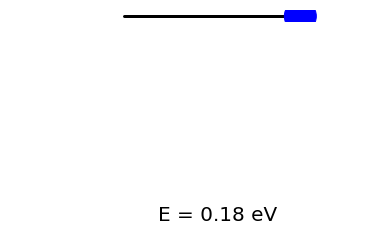

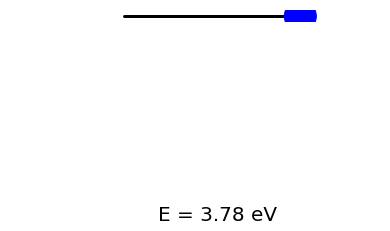

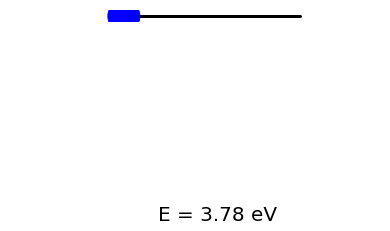

In [14]:
for ind in range(ed-2, ed+2):
    fig=plt.figure(figsize=(6,6))
    ax = plt.gca()
    ax.set_aspect('equal')
    visualize_backbone(ax, geom)
    visualize_evec(ax, geom, evecs[ind,:])
    plt.axis('off')
    xmin = np.min(geom.positions[:, 0])-0.7
    xmax = np.max(geom.positions[:, 0])+0.7
    ymin = np.min(geom.positions[:, 1])-0.2
    ymax = np.max(geom.positions[:, 1])+0.2
    plt.xlim([xmin, xmax])
    plt.text(xmin+1.0, ymin-1.6, "E = %.2f eV" % evals[ind], fontsize=20)
    plt.savefig("./figures_hub/orb_%d_%d.png" % (ind, ind-homo), dpi=300, bbox_inches='tight')

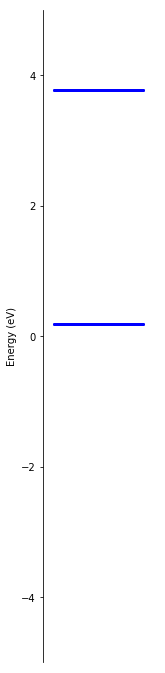

In [9]:
fig = plt.figure(figsize=(2, 12))
ax = plt.gca()
for ev in evals:
    col = 'blue'
    if ev < 0.0:
        col = 'red'
    plt.plot([0.1, 0.9], [ev, ev], '-', color=col, lw=3.0, solid_capstyle='round')
    
ax.get_xaxis().set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xlim(0.0, 1.0)
plt.ylim(-5.0, 5.0)
plt.ylabel("Energy (eV)")
plt.savefig("./levels.png", dpi=300, bbox_inches='tight')